# Predicting Football Match Attendance

**Background** : data on the League of Ireland football matches between 2012 - 2024. It contains 2,144 observations(rows) and 32 variables.

**Objective**: Using regression models to predict match attendance ("attend")

In [75]:
#Importing the data handling and graphing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

#Importing the Scikit-learn libraries.
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [76]:
#Importing the data on the League of Ireland football matches 
df = pd.read_csv('attend.csv')

# Q1 Exploring the data 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h_team_id       2114 non-null   int64  
 1   a_team_id       2114 non-null   int64  
 2   day             2114 non-null   int64  
 3   fix_time        2114 non-null   float64
 4   fix_round       2114 non-null   int64  
 5   temp            2114 non-null   int64  
 6   rain            2114 non-null   int64  
 7   distance        2114 non-null   float64
 8   dist_time       2114 non-null   int64  
 9   sunset          2114 non-null   float64
 10  attend          2099 non-null   float64
 11  hw_odds         2114 non-null   float64
 12  d_odds          2114 non-null   float64
 13  h_injuries      2113 non-null   float64
 14  a_injuries      2114 non-null   int64  
 15  h_suspensions   2112 non-null   float64
 16  a_suspensions   2111 non-null   float64
 17  h_penalty_c     2114 non-null   i

based on the above, the dataset is only made numerical values float64(10) and int64(22), however for some variables it is better to consider them as categorical variables.

From the No-Null Count it shows that columns with missing values have missing rows (less than 2114)

However, the missing values are not extreme with the largest being approximately less than - 1.4% less rows. These missing values will be later dropped

In [78]:
df.describe()

,h_team_id,a_team_id,day,fix_time,fix_round,temp,rain,distance,dist_time,sunset,...,derby,league_pos_h,league_pos_a,tv,tv_all,radius_25k,last_home_game,points_top,points_bottom,season
count,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.00000,2114.000000,2114.000000,2114.000000,2114.000000,...,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2084.000000,2114.000000,2114.000000,2114.000000
mean,8.016083,7.981552,5.230369,19.253525,17.648534,12.68543,0.145695,162.114167,120.376064,19.951939,...,0.101703,6.126774,6.206244,0.068590,0.184011,0.402554,15.998560,15.509934,12.168401,2017.522233
std,4.924487,4.904303,1.749966,0.973004,10.103437,4.31354,0.352884,99.531821,68.663270,1.422415,...,0.302329,3.324394,3.286456,0.252816,0.387585,0.665002,16.985281,13.229316,12.623906,3.839507
min,1.000000,1.000000,1.000000,11.300000,1.000000,0.00000,0.000000,1.650000,5.000000,16.200001,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-14.000000,2012.000000
25%,4.000000,4.000000,6.000000,19.450001,9.000000,10.00000,0.000000,85.000000,59.000000,18.442501,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2.000000,2014.000000
50%,8.000000,8.000000,6.000000,19.450001,17.000000,13.00000,0.000000,200.000000,135.000000,20.290001,...,0.000000,6.000000,6.000000,0.000000,0.000000,0.000000,14.000000,12.000000,9.000000,2017.000000
75%,11.000000,11.000000,6.000000,19.450001,26.000000,16.00000,0.000000,246.000000,164.000000,21.250000,...,0.000000,9.000000,9.000000,0.000000,0.000000,1.000000,20.000000,24.000000,19.000000,2022.000000
max,19.000000,19.000000,7.000000,20.299999,36.000000,27.00000,1.000000,427.000000,321.000000,22.129999,...,1.000000,12.000000,14.000000,1.000000,1.000000,2.000000,147.000000,71.000000,68.000000,2024.000000


### Identifying missing values 
Removing missing values reduces accuracy score based skew 

In [79]:
#identifying missing values  
df.isnull().sum()

h_team_id          0
a_team_id          0
day                0
fix_time           0
fix_round          0
temp               0
rain               0
distance           0
dist_time          0
sunset             0
attend            15
hw_odds            0
d_odds             0
h_injuries         1
a_injuries         0
h_suspensions      2
a_suspensions      3
h_penalty_c        0
a_penalty_c        0
win_lg             0
draw_lg            0
loss_lg            0
derby              0
league_pos_h       0
league_pos_a       0
tv                 0
tv_all             0
radius_25k         0
last_home_game    30
points_top         0
points_bottom      0
season             0
dtype: int64

# Analysis of main dependent variable Y

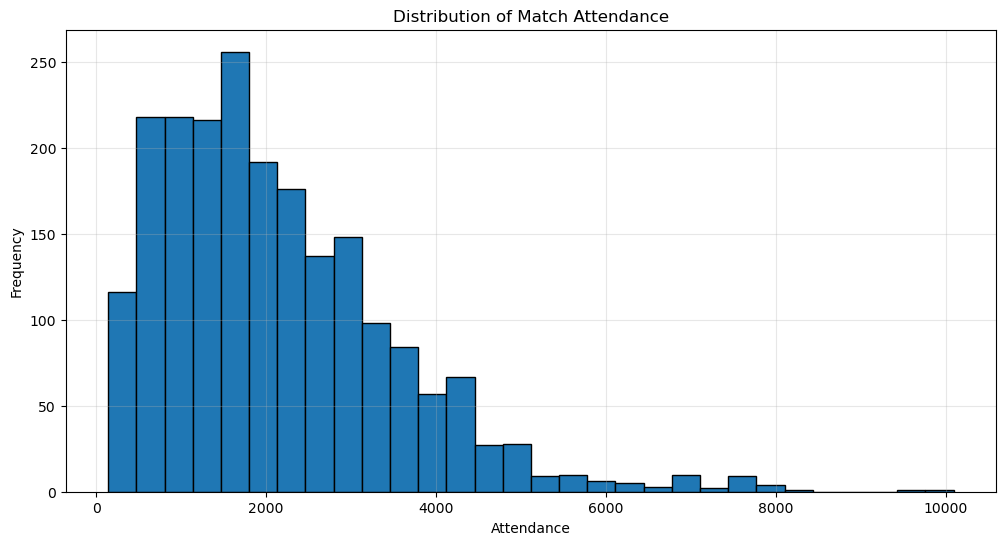

In [80]:
#Check attendance distribution 
plt.figure(figsize=(12, 6))
plt.hist(df['attend'], bins=30, edgecolor='black')
plt.title('Distribution of Match Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
#Check outlier in attendance 
Q1 = df['attend'].quantile(0.25)
Q3 = df['attend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['attend'] < lower_bound) | (df['attend'] > upper_bound)]
print(f"Number of potential outliers in attendance: {len(outliers)}")

Number of potential outliers in attendance: 48


**The distribution of Match Attendence is right-skewed, with most match attendance are clustered approximately 1,000 and 2,500** 

-Suggests that there are specific games that are of high attendace, may be influenced by some of the predictors such as Day, Derby etc. -The outlier may be indicated by the few values in the upper end near 10,000

# Analysis of relationship between Y(attend) and X variables of interest

key categorical variables : Day, Derby, tv, season -- can significantly influence match attendace and fan engagement / preference

key continuous variables : fix_time, temp, distance, hw_odds -- have a quantifiable weight as numerical variables on attendance figures

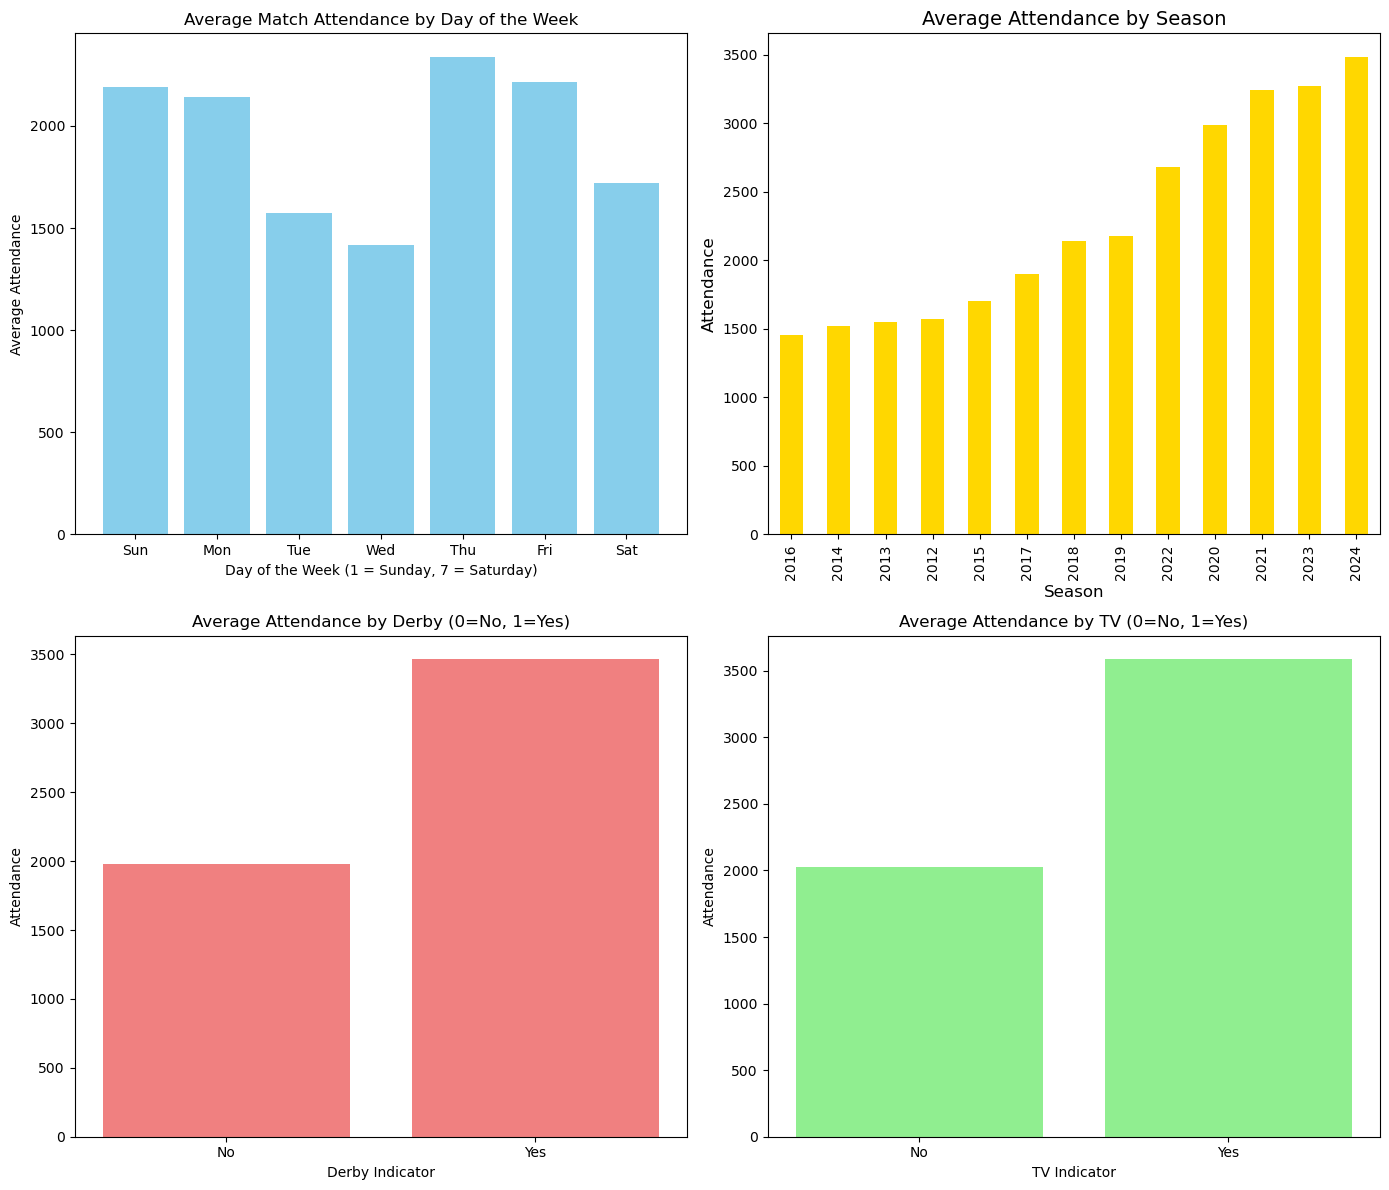

In [82]:
#relationship between attendance and key categorical variables 
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1) Average attendance by 'day'
day_avg = df.groupby('day')['attend'].mean().sort_index()
axes[0, 0].bar(day_avg.index, day_avg.values, color='skyblue')
axes[0, 0].set_title("Average Match Attendance by Day of the Week")
axes[0, 0].set_xlabel("Day of the Week (1 = Sunday, 7 = Saturday)")
axes[0, 0].set_ylabel("Average Attendance")
axes[0, 0].set_xticks(range(1, 8))
axes[0, 0].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# 2) Average attendance by 'season'
df_season = df.groupby('season')['attend'].mean().sort_values()
df_season.plot(kind='bar', ax=axes[0, 1], color='gold')
axes[0, 1].set_title('Average Attendance by Season', fontsize=14)
axes[0, 1].set_xlabel('Season', fontsize=12)
axes[0, 1].set_ylabel('Attendance', fontsize=12)

# 3) Average attendance by 'derby'
df_derby = df.groupby('derby')['attend'].mean().sort_values()
axes[1, 0].bar(df_derby.index, df_derby.values, color='lightcoral')
axes[1, 0].set_title('Average Attendance by Derby (0=No, 1=Yes)')
axes[1, 0].set_xlabel('Derby Indicator')
axes[1, 0].set_ylabel('Attendance')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(["No", "Yes"])

# 4) Average attendance by 'tv'
df_tv = df.groupby('tv')['attend'].mean().sort_values()
axes[1, 1].bar(df_tv.index, df_tv.values, color='lightgreen')
axes[1, 1].set_title('Average Attendance by TV (0=No, 1=Yes)')
axes[1, 1].set_xlabel('TV Indicator')
axes[1, 1].set_ylabel('Attendance')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(["No", "Yes"])

plt.tight_layout()
plt.show()

In [83]:
print(f"Observations after/during COVID (2021-2022): {len(df[df['season'].isin([2021, 2022])])}")
print(f"Observations during COVID (2020-2021): {len(df[df['season'].isin([2020, 2021])])}")
print(f"Observations before COVID (2019-2020): {len(df[df['season'].isin([2019, 2020])])}")

Observations after/during COVID (2021-2022): 209
Observations during COVID (2020-2021): 51
Observations before COVID (2019-2020): 202


#### Relationship between attendance and key categorical variables 
**Day** -- Highest match attendance is on Thur(5) then Fri, Sun. Suggest there is more attendance during the weekends. This could also be related to fix_time.

**Season** -- Increasing gradually over time, however there is a spike post pandemic relating to the increase in activity after the pandemic 

**Derby and TV indicator** -- both binary variables, have similar outcomes suggest multicolinearity. This might be because of fans preference for Derby matches and its importance would lead to being televised. 

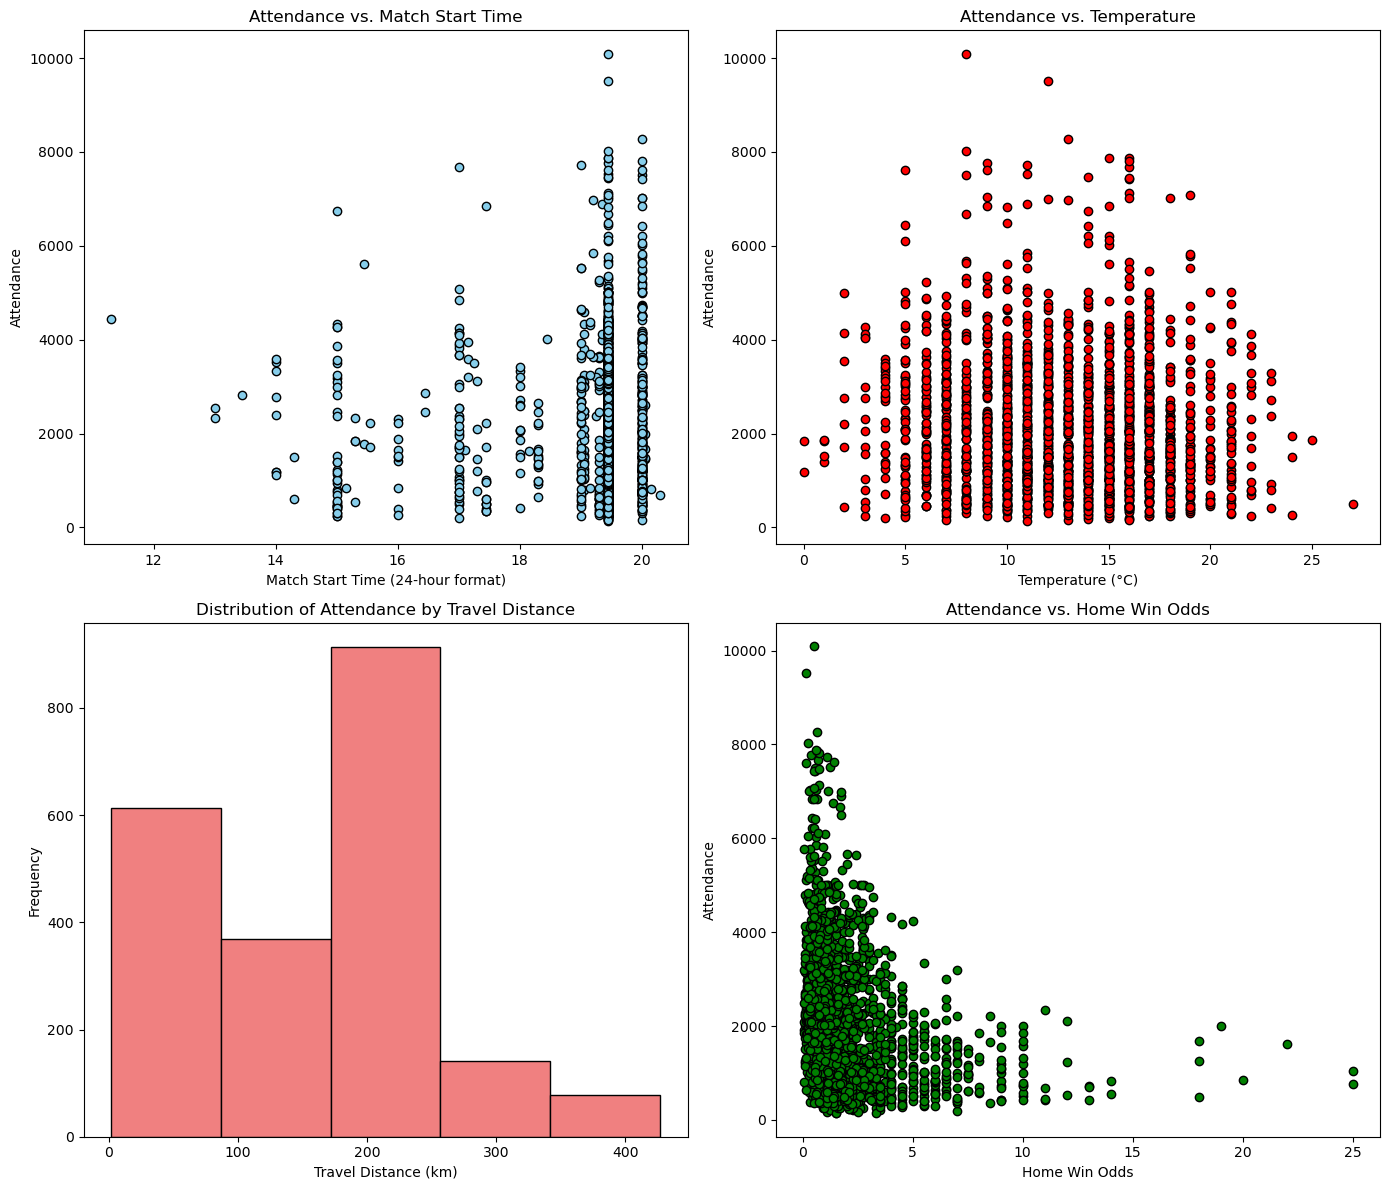

In [84]:
# Relationship between attend and key continuous variables of interest 

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1) Scatter plot for fix_time vs Attendance 
axes[0, 0].scatter(df['fix_time'], df['attend'], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Attendance vs. Match Start Time')
axes[0, 0].set_xlabel('Match Start Time (24-hour format)')
axes[0, 0].set_ylabel('Attendance')

# 2) Scatter Plot with Regression for 'temp' vs. Attendance
axes[0, 1].scatter(df['temp'], df['attend'], color='red', edgecolor='black')
axes[0, 1].set_title('Attendance vs. Temperature')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Attendance')

# 3) Histogram for 'distance' vs. Attendance
axes[1, 0].hist(df['distance'], bins=5, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Attendance by Travel Distance')
axes[1, 0].set_xlabel('Travel Distance (km)')
axes[1, 0].set_ylabel('Frequency')

# 4) Scatter Plot with Regression for 'hw_odds' vs. Attendance
axes[1, 1].scatter(df['hw_odds'], df['attend'], color='green', edgecolor='black')
axes[1, 1].set_title('Attendance vs. Home Win Odds')
axes[1, 1].set_xlabel('Home Win Odds')
axes[1, 1].set_ylabel('Attendance')

plt.tight_layout()
plt.show()

#### Relationship between attendance and key continuous variables 
**Match Start Time** -- Higher attendance for later start times between (18:00 - 20:00)

**Temperature** -- Not a strong linear relationship with attendance. However, high cluster of attendance for moderate temperature (9-15°C)

**Travel Distance** -- Higher attendance associated to matches that are within 50-200km, fans less likely to travel for away matches.

**Home Win Odds** -- Higher attendance when home side has more favourable odds. 

# Q2 Defining matrix for X and Y variable 

In [85]:
print(df.dtypes)

h_team_id           int64
a_team_id           int64
day                 int64
fix_time          float64
fix_round           int64
temp                int64
rain                int64
distance          float64
dist_time           int64
sunset            float64
attend            float64
hw_odds           float64
d_odds            float64
h_injuries        float64
a_injuries          int64
h_suspensions     float64
a_suspensions     float64
h_penalty_c         int64
a_penalty_c         int64
win_lg              int64
draw_lg             int64
loss_lg             int64
derby               int64
league_pos_h        int64
league_pos_a        int64
tv                  int64
tv_all              int64
radius_25k          int64
last_home_game    float64
points_top          int64
points_bottom       int64
season              int64
dtype: object


In [86]:
#List of columns to convert into variables 
categorical_cols = ['day', 'h_team_id', 'a_team_id', 'win_lg', 'loss_lg', 'draw_lg', 
                   'derby', 'tv', 'tv_all', 'season']

In [87]:
#convert into strings 
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

In [88]:
#checking that there is no strings 
print(df[categorical_cols].dtypes)

day          object
h_team_id    object
a_team_id    object
win_lg       object
loss_lg      object
draw_lg      object
derby        object
tv           object
tv_all       object
season       object
dtype: object


In [89]:
#create dummy variables - to properly account for categorical variables 
df_dummies = pd.get_dummies(df,columns=categorical_cols, drop_first=False)

In [90]:
print(df_dummies.dtypes)

fix_time       float64
fix_round        int64
temp             int64
rain             int64
distance       float64
                ...   
season_2020       bool
season_2021       bool
season_2022       bool
season_2023       bool
season_2024       bool
Length: 93, dtype: object


In [91]:
#identifying missing values  
df_dummies.isnull().sum()

fix_time       0
fix_round      0
temp           0
rain           0
distance       0
              ..
season_2020    0
season_2021    0
season_2022    0
season_2023    0
season_2024    0
Length: 93, dtype: int64

In [92]:
missingvalues = ['attend','h_injuries','h_suspensions','a_suspensions','last_home_game']

In [93]:
#dropping the missing values from the data set 
df_dummies_clean=df_dummies.dropna(subset=['attend','h_injuries','h_suspensions','a_suspensions','last_home_game'])

# Defining X and Y matrix

In [94]:
Y = df_dummies_clean["attend"]

**log-transform Y** because as seen in the distribution in Q1 , attendace was right-skewed, by using log, it will make the distribution more normal 

In [95]:
Y = df_dummies_clean["attend"].apply(np.log)

In [96]:
X=df_dummies_clean.drop(columns="attend",axis=1)
X.columns.tolist()

['fix_time',
 'fix_round',
 'temp',
 'rain',
 'distance',
 'dist_time',
 'sunset',
 'hw_odds',
 'd_odds',
 'h_injuries',
 'a_injuries',
 'h_suspensions',
 'a_suspensions',
 'h_penalty_c',
 'a_penalty_c',
 'league_pos_h',
 'league_pos_a',
 'radius_25k',
 'last_home_game',
 'points_top',
 'points_bottom',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'day_7',
 'h_team_id_1',
 'h_team_id_10',
 'h_team_id_11',
 'h_team_id_12',
 'h_team_id_13',
 'h_team_id_14',
 'h_team_id_15',
 'h_team_id_16',
 'h_team_id_17',
 'h_team_id_18',
 'h_team_id_19',
 'h_team_id_2',
 'h_team_id_3',
 'h_team_id_4',
 'h_team_id_5',
 'h_team_id_6',
 'h_team_id_7',
 'h_team_id_8',
 'h_team_id_9',
 'a_team_id_1',
 'a_team_id_10',
 'a_team_id_11',
 'a_team_id_12',
 'a_team_id_13',
 'a_team_id_14',
 'a_team_id_15',
 'a_team_id_16',
 'a_team_id_17',
 'a_team_id_18',
 'a_team_id_19',
 'a_team_id_2',
 'a_team_id_3',
 'a_team_id_4',
 'a_team_id_5',
 'a_team_id_6',
 'a_team_id_7',
 'a_team_id_8',
 'a_team_id_9

In [97]:
print(X.shape)
print(Y.shape)

(2066, 92)
(2066,)


# Q3 Simple linear regression 

attend=β0 +β1⋅distance+β2⋅temp+β3⋅hw_odds+...+ε

In [51]:
#defining predictors set for simple regression 
X_reg1_var = ['distance','derby_1','temp','hw_odds']
X_reg1 = df_dummies_clean[X_reg1_var]

In [52]:
#splitting the data once so that it can be used for other regressions 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
#Subset X_train and X_test
X_train_reg1 = X_train[X_reg1_var]
X_test_reg1 = X_test[X_reg1_var]

In [54]:
from sklearn.linear_model import LinearRegression,Lasso, LassoCV, RidgeCV, Ridge, ElasticNet

#Fitting model to regression 1 
reg1= LinearRegression().fit(X_train_reg1, Y_train)
coef_reg1 = pd.Series(reg1.coef_, index=X_reg1.columns)

#Test R^2 score and Train R^2 score
score1 = reg1.score(X_test_reg1,Y_test)
score1_tr = reg1.score(X_train_reg1, Y_train)

#Predicting Y for regression 1 
Y_test_reg1 = reg1.predict(X_test_reg1)

#calculating the test MSE for regression 1 
from sklearn.metrics import mean_squared_error
test_mse_reg1 = mean_squared_error(Y_test, Y_test_reg1)

In [55]:
# Print results in a DataFrame
import pandas as pd
Model1 = pd.DataFrame({
    "Model": ["Reg1"],
    "Test R^2": [score1],
    "Test MSE": [test_mse_reg1]
})
print(Model1)

  Model  Test R^2  Test MSE
0  Reg1  0.155958  0.468328


#### Interpretation of Model 1 results 
Model fit : 
**Test R^2** is 0.156 which means that the model is explaining 15.6% variation in match attendance 

**Test MSE** : approximately 0.468 shows on average how far the predictors are from true values in squared-error terms 

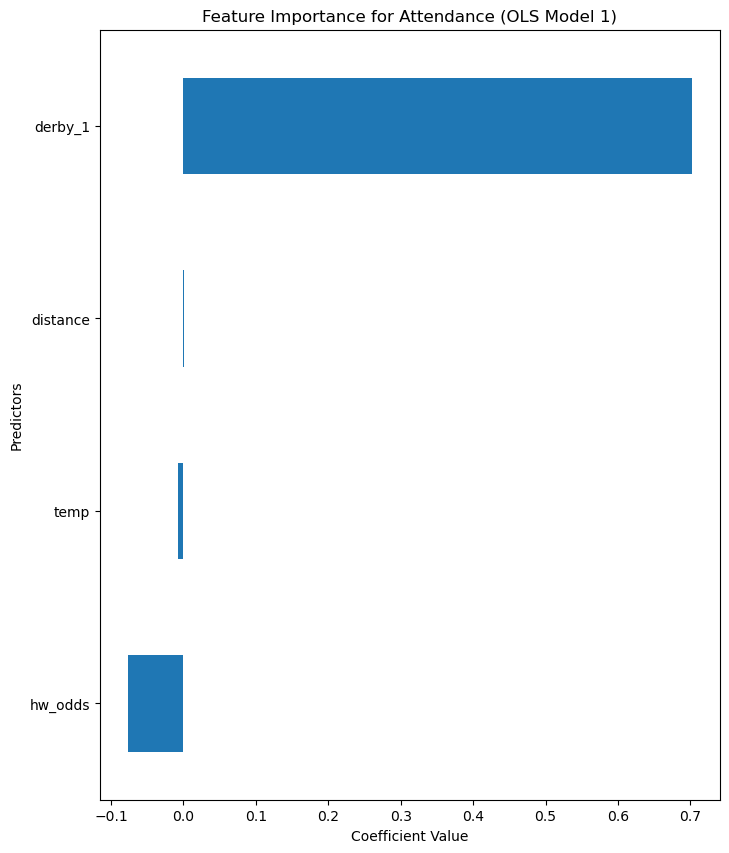

In [56]:
#Plotting set of coefficients as a barchart

#Extract and sort coefficients 
coef_reg1 = pd.Series(reg1.coef_, index=X_reg1.columns)
coef_reg1_sorted = coef_reg1.sort_values()


#Plot for model1 
plt.figure(figsize=(8,10))
coef_reg1_sorted.plot(kind="barh")
plt.title("Feature Importance for Attendance (OLS Model 1)")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictors")
plt.show()

#### Coefficient values interpretation

**derby_1** has the largest coefficient, relating to the high attendance shown in graph Q1, derby matches increases match attendance 

**temp** smaller positive coefficient, higher temperatures suggests high attendance however has a modest effect 

**hw_odds** negative coefficient, shows that as home-win odds increases attendance drops. 

**distance** very small coefficient , minimal direct effect on match attendance

# Q4 

## The importance of using test data for model evaluation 

**Risk of overfitting** If the training data is only ised to assess the model, it could lead to the model memorising the training data rather than learning prediction patterns. Using test data will give an unbiased perspective on how accurate the model is on previously unseen data. 

**Therefore when choosing the best model, it is important to choose the model with lowest test MSE and highest test R^2** which suggests the model perfoms well with unseen data.

Good results on training data does not guarantee that the model will perfom well on testing data. 

**Applying the above model selection process by expanding on the simple linear regression**

In [57]:
#Expanding on the simple regression by adding more x variables 
X_reg2_var = ['distance','derby_1','temp','hw_odds','a_injuries','league_pos_a']
X_reg3_var = ['distance','derby_1','temp','hw_odds','a_injuries','league_pos_a','h_penalty_c','last_home_game','points_bottom','loss_lg_0']

In [58]:
#Defining predictors set 
X_reg2 = df_dummies_clean[X_reg2_var]
X_reg3 = df_dummies_clean[X_reg3_var]

#Subset X_train and X_test
X_train_reg2 = X_train[X_reg2_var]
X_test_reg2 = X_test[X_reg2_var]

X_train_reg3 = X_train[X_reg3_var]
X_test_reg3 = X_test[X_reg3_var]


In [59]:
#Fitting model to regression 2
reg2= LinearRegression().fit(X_train_reg2, Y_train)
coef_reg2 = pd.Series(reg2.coef_, index=X_reg2.columns)

#Test R^2 score and Train R^2 score
score2 = reg2.score(X_test_reg2,Y_test)
score2_tr = reg2.score(X_train_reg2, Y_train)

#Predicting Y for regression 2
Y_test_reg2 = reg2.predict(X_test_reg2)

#calculating the test MSE for regression 2
test_mse_reg2 = mean_squared_error(Y_test, Y_test_reg2)

In [60]:
#Fitting model to regression 3
reg3= LinearRegression().fit(X_train_reg3, Y_train)
coef_reg3 = pd.Series(reg3.coef_, index=X_reg3.columns)

#Test R^2 score and Train R^2 score
score3 = reg3.score(X_test_reg3,Y_test)
score3_tr = reg3.score(X_train_reg3, Y_train)

#Predicting Y for regression 3
Y_test_reg3 = reg3.predict(X_test_reg3)

#calculating the test MSE for regression 3 
test_mse_reg3 = mean_squared_error(Y_test, Y_test_reg3)

In [61]:
#Comparing test R^2 and test MSE across models 
# Print results in a DataFrame
import pandas as pd
Model_results = pd.DataFrame({
    "Model": ["Reg1", "Reg2","Reg3"],
    "Test R^2": [score1, score2,score3],
    "Test MSE": [test_mse_reg1, test_mse_reg2, test_mse_reg3]
})
print(Model_results)

  Model  Test R^2  Test MSE
0  Reg1  0.155958  0.468328
1  Reg2  0.194466  0.446961
2  Reg3  0.318933  0.377899


### Interpretation 
It is clear from the above results that Test R^2 increased as model complexity increased, while Test MSE decreased with model complexity. 

Model 3 is the best performing model on unseen test data 

## The effect of increasing model complexity on training accuracy vs test accuracy 

**Training MSE** Decreases with Complexity 
**Test MSE** Decreases with Complexity and suggesta true generalisation
-if it increases with complexity , it means that the model is overfitting
-if it drops as training MSE drops, suggests that the model is becoming more of an accurate prediction as it increases in complexity

In [62]:
#Predicting Y (training) for each model
Y_train_reg1 = reg1.predict(X_train_reg1)
Y_train_reg2 = reg2.predict(X_train_reg2)
Y_train_reg3 = reg3.predict(X_train_reg3)

In [63]:
#Calculating the training MSE for each model 
train_mse_reg1 = mean_squared_error(Y_train, Y_train_reg1)
train_mse_reg2 = mean_squared_error(Y_train, Y_train_reg2)
train_mse_reg3 = mean_squared_error(Y_train, Y_train_reg3)

In [64]:
#Comparing test MSE and train MSE across models 
# Print results in a DataFrame
import pandas as pd
MSE_results = pd.DataFrame({
    "Model": ["Reg1", "Reg2","Reg3"],
    "Test MSE": [test_mse_reg1, test_mse_reg2, test_mse_reg3],
    "Train MSE": [train_mse_reg1, train_mse_reg2, train_mse_reg3]
})
print(MSE_results)

  Model  Test MSE  Train MSE
0  Reg1  0.468328   0.408589
1  Reg2  0.446961   0.387688
2  Reg3  0.377899   0.325160


## Interpretation 

Both Test MSE and Train MSE have decreased with model complexity, this suggests that the model is not overfitting 

The gap between Test MSE and Train MSE is smallest for regression 3 but largest for regression 1. Suggests that increasing the complexity in the model has led to a better generalisation. 

## Cross-Validation (CV) and how it helps improve model performance.

Cross-validation splits the dataset into multiple training and validation folds, then assesses how well a model generalises unseen data 

Method :Instead of a single train/test split, CV randomly parts the dataset into k distint subsets(folds) of train and test data. 
Test the model k times on the different subsets then calculates an average perfomance matrix 

Benefit : Error is recorded for each k-test fold. The average of the k recorded errors is the cross validation error and will be the perfomance metric for the model.

# Q5 Improving the model 

## Why use penalised regression techniques

Using penalised regression techniques such as Lasso and Ridge Regression helps overcome the problem of a bias-variance trade of, by accounting for this trade off by applying a penalty term on the coefficents. Which leads to a more generalised and robust model. 

Ridge - force some of the parameter estimates to zero 

Lasso - force some of the parameters equal to zero 

## Why add more explanatory variables such as non-linear terms and interactions 

Adding non linear terms such as polynomial transformations - for continuous variables to reflect real world complexity, for example using a quadratic (squaring the predictors)will allow model to predict curvature 

Adding interactions terms help to account for how two predictors may effect each other for example the relationship betweenn derby and tv, ensures that the model accounts for their combined effect 

Overall adding more explanatory variables increases accuracy of the model

**Expand on model 3 as it has the lowest test MSE**

In [65]:
from sklearn.preprocessing import PolynomialFeatures

#Selecting numeric predictors to transform into polynomial 
poly_features = ['distance', 'temp', 'hw_odds', 'a_injuries', 'league_pos_a']

In [66]:
#Creating an interaction and polynomial term
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[poly_features])
X_test_poly = poly.transform(X_test[poly_features])

In [67]:
#Convert polynomial back into dataframe 
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(poly_features), index=X_train.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(poly_features), index=X_test.index)

# Add dummy variables (excluding one category per group to avoid multicollinearity)
selected_dummies = ['derby_1', 'tv_1'] + [col for col in X_train.columns if 'season' in col and col != 'season_2024']

X_train_new = X_train_poly_df.join(X_train[selected_dummies])
X_test_new = X_test_poly_df.join(X_test[selected_dummies])

## Using a Lasso and Ridge model

In [68]:
#Using cross validation to find the best alpha for Ridge and Lasso

from sklearn.linear_model import RidgeCV, LassoCV

ridge_ = RidgeCV(alphas=[0.1, 2, 12], cv=5).fit(X_train_new, Y_train)
lasso_ = LassoCV(alphas=[ 0.1, 2, 12], cv=5).fit(X_train_new, Y_train)

print(f"Best Ridge alpha: {ridge_.alpha_}")
print(f"Best Lasso alpha: {lasso_.alpha_}")

Best Ridge alpha: 0.1
Best Lasso alpha: 0.1


In [70]:
#Setting alpha values 
alpha_lasso = 0.1
alpha_ridge = 0.1

#Train Lasso and Ridge Regression 

lasso = Lasso(alpha=alpha_lasso).fit(X_train_new, Y_train)
coef_lasso = pd.Series(lasso.coef_, index = X_train_new.columns)
score_lasso = lasso.score(X_test_new, Y_test)
Y_train_lasso = lasso.predict(X_train_new)
Y_test_lasso = lasso.predict(X_test_new)

ridge = Ridge(alpha=alpha_ridge).fit(X_train_new, Y_train)
score_ridge = ridge.score(X_test_new, Y_test)
Y_train_ridge = ridge.predict(X_train_new)
Y_test_ridge = ridge.predict(X_test_new)

In [73]:
#Computing mean squared error for each model 

train_mse_lasso = mean_squared_error(Y_train, Y_train_lasso)
test_mse_lasso = mean_squared_error(Y_test, Y_test_lasso)

train_mse_ridge = mean_squared_error(Y_train, Y_train_ridge)
test_mse_ridge = mean_squared_error(Y_test, Y_test_ridge)

In [74]:
# Print results in a DataFrame
import pandas as pd
results = pd.DataFrame({
    "Model": ["OLS3","Lasso", "Ridge"],
    "Test R^2": [score3, score_lasso, score_ridge],
    "Train MSE": [train_mse_reg3, train_mse_lasso,train_mse_ridge],
    "Test MSE": [train_mse_reg3,test_mse_lasso, test_mse_ridge]
})
print(results)

   Model  Test R^2  Train MSE  Test MSE
0   OLS3  0.318933   0.325160  0.325160
1  Lasso  0.211963   0.387748  0.437253
2  Ridge  0.508042   0.240137  0.272969


## Interpretation
Based on comparing the Test R^2, Train MSE and Test MSE ,

Ridge model clearly perfoms better as it has the highest R^2 and the lowest train MSE and test MSE. 

Lasso model has the lowest R^2 but the highest test MSE. Which suggest overfitting, due to overpenalisation. Suffering from the bias and variance trade off.

**Conclusion** Ridge effectively controlled variance and reduced bias, making the model provide more generalized and accurate predictions of match attendance  